In [150]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [151]:
### First some sales analysis. 

### Merge several files, in this case 2, into one csv
path = "./wines" #folder with the csv files we want to merge
files = [file for file in os.listdir(path) if not file.startswith('.')] #ignore hidden files

all_types_wine = pd.DataFrame()

for file in files:
    current_wine = pd.read_csv(path+"/"+file, sep=';') # важно е да се определи още тук sep=';'
    all_types_wine = pd.concat([all_types_wine, current_wine])


# all_types_wine.head() # check if everything is OK  
all_types_wine.to_csv("all_wine.csv",sep=';', index=False) #поставямe sep=';' и тук

In [152]:
# this is a df with concatenated csv files
all_wine=pd.read_csv("all_wine.csv",sep=';') #поставямe sep=';' и тук
all_wine.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [153]:
### add column "Total acidity"=fixed+volatile
all_wine['total acidity']=all_wine['fixed acidity']+all_wine['volatile acidity']
all_wine.head(7)

#all_wine.dtypes # determine data type in each column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,8.06
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,8.50


In [154]:
### drop NaN columns/rows, here it is not necessary!

# # check if there are any such rows
# nan_df=all_wine[all_wine.isna().any(axis=1)]
# #display(nan_df.head()) # same as below
# nan_df.head()

# # drop each column that has all NaN values; the same fo rows omit axis=1   
# all_wine2=all_wine.dropna(axis=1,how='all')
# all_wine2.head(7)

In [155]:
### imagine quality=month and alcohol=sale. what is the best month for sales? How much was earned this month?

### other usage with groupby: mean(), count(), max(), min()

all_wine.groupby(['quality']).sum()
#all_wine[['alcohol','quality']].groupby(['quality']).sum() # to show less columns; result is df
#all_wine.groupby(['quality']).sum()['alcohol'] # to extract the 'alcohol' column, result is series

#all_wine[['alcohol','quality']].groupby(['quality']).head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity
quality,,,,,,,,,,,,
3,235.60,15.510,8.43,154.2,2.311,1176.5,3661.0,29.872320,97.73,15.19,306.45,251.110
4,1574.40,98.920,58.82,897.2,12.972,4457.5,22341.5,214.883850,698.03,109.22,2198.90,1673.320
5,15664.70,832.995,657.91,12409.2,138.256,64647.5,258354.0,2129.125135,6867.66,1125.45,21033.18,16497.695
6,20354.70,890.115,917.68,15739.1,153.590,88384.0,327305.0,2820.567455,9125.47,1510.31,30026.30,21244.815
7,7692.15,311.615,361.21,5105.5,48.849,32825.5,117070.0,1071.582860,3483.09,590.24,12285.50,8003.765
8,1319.20,56.165,64.18,1038.9,7.937,6665.0,22681.0,191.555110,622.08,98.91,2254.00,1375.365
9,37.10,1.490,1.93,20.6,0.137,167.0,580.0,4.957300,16.54,2.33,60.90,38.590


range(3, 10)


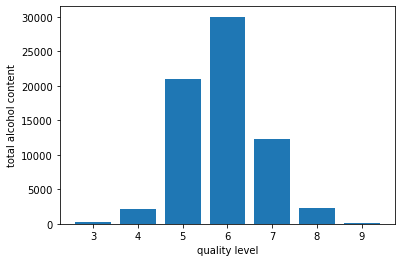

In [156]:
### plot results: which quality=mounth is best for alcohol=sales. here we have month number, not string.

quality=range(3,10)
print(quality)

plt.bar(quality, all_wine.groupby(['quality']).sum()['alcohol']) #
plt.xticks(quality)
plt.ylabel('total alcohol content')
plt.xlabel('quality level')
plt.show()

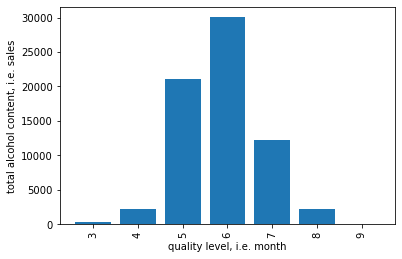

In [157]:
### another plot. now imagine quality=city, i.e. string content. show which city has most sales

keys=[qual for qual, df in all_wine.groupby(['quality'])]

plt.bar(keys, all_wine.groupby(['quality']).sum()['alcohol'])
plt.xticks(keys, rotation='vertical', size=10)
plt.ylabel('total alcohol content, i.e. sales')
plt.xlabel('quality level, i.e. month')
plt.show()

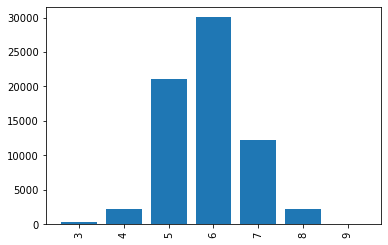

<ipython-input-158-f7646686c839>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(keys, rotation='vertical', size=10)
<ipython-input-158-f7646686c839>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


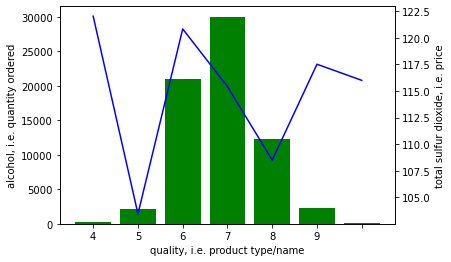

In [158]:
# now imagine quality=product type/name, i.e. string content, and alcohol=quantity ordered . what product sold the most

product_group=all_wine.groupby('quality')
quantity_ordered=product_group.sum()['alcohol']

keys=[pair for pair, df in product_group]

plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
#plt.ylabel('total alcohol content, i.e. sales')
#plt.xlabel('quality level, i.e. month')
plt.show()

# add another plot on top of this. imagine 'total sulfur dioxide'=price of each product
prices=all_wine.groupby('quality').mean()['total sulfur dioxide']

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('quality, i.e. product type/name')
ax1.set_ylabel('alcohol, i.e. quantity ordered')
ax2.set_ylabel('total sulfur dioxide, i.e. price')
ax2.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()


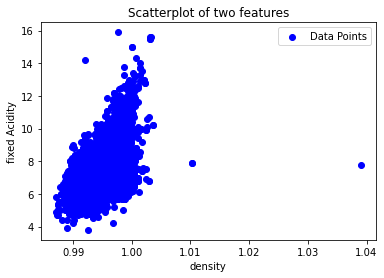

In [159]:
### Lets see what more we can get from this data

# Scatter plot the data points
plt.scatter(all_wine['density'], all_wine['fixed acidity'], label='Data Points', color='blue', marker='o')

# Connect the data points with lines, but now we'd rather not to, it's a mess here
#plt.plot(all_wine['alcohol'], all_wine['fixed acidity'], color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Set axis labels and a title
plt.xlabel('density')
plt.ylabel('fixed Acidity')
plt.title('Scatterplot of two features')

# # Set custom axis limits if we want a closer look
# plt.xlim(0.98, 1.005)  
# plt.ylim(4, 6) 

# Add a legend
plt.legend() # notation with used data markers

# Display the plot
plt.show()

In [160]:
# if we spot an outlier, for example in the plot density vs fixed acidity:
up_bound=1.041
lo_bound=1.038

# Find the indices of the outliers or create new dataframe
filtered_df = all_wine[(all_wine['density'] >= lo_bound) & (all_wine['density'] <= up_bound)]
##outlier_indices = all_wine['density'][(all_wine['density'] < up_bound) & (all_wine['density'] > lo_bound)].index

# Access the rows of your DataFrame corresponding to the outliers
##outlier_rows = all_wine.loc[outlier_indices]

# Print or work with the DataFrame containing the outlier rows
print(filtered_df)
##print(outlier_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4380            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4380                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  total acidity  
4380     11.7        6          8.765  


In [161]:
# descriptive

#all_wine.describe() # descriptive table with basic features
# all_wine.cov() # covariance и correlation за Data Frame
all_wine.corr() #

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.992811
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.334217
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.267022
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.132212
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.334301
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.316354
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.368691
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.476561
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.212023
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.317087


In [176]:
# find highest correlation value, not excluding self correlation
# Calculate the correlation matrix
correlation_matrix = all_wine.corr()

# Flatten the correlation matrix, sort it in descending order
sorted_correlations = correlation_matrix.stack().sort_values(ascending=False)

# Remove duplicated values
sorted_correlations = sorted_correlations.drop_duplicates(keep='first')

# Print all correlations in descending order
print("All correlations in descending order:")
sorted_correlations.head(20)

All correlations in descending order:


total acidity         total acidity          1.000000
fixed acidity         total acidity          0.992811
total sulfur dioxide  free sulfur dioxide    0.720934
density               residual sugar         0.552517
total sulfur dioxide  residual sugar         0.495482
density               total acidity          0.476561
                      fixed acidity          0.458910
alcohol               quality                0.444319
residual sugar        free sulfur dioxide    0.402871
sulphates             chlorides              0.395593
volatile acidity      chlorides              0.377124
density               chlorides              0.362615
total acidity         chlorides              0.334301
                      volatile acidity       0.334217
citric acid           fixed acidity          0.324436
sulphates             total acidity          0.317087
fixed acidity         sulphates              0.299568
                      chlorides              0.298195
density               volati